#   Problem Description

As a data scientist for BestDeal retailer, you
have been tasked with improving their revenue and the effectiveness of the
marketing campaign of their electronic products. The given dataset has
10,000 records for the purchases of their customers and is used to predict
customers shopping patterns and to provide answers for ad-hoc queries.
The dataset DirtyData4BestDeal10000.csv is drawn from its database of
customers.

In [27]:
import pandas as pd  # panda's nickname is pd

import numpy as np  # numpy as np

from pandas import DataFrame, Series     # for convenience

import sqlalchemy

from sqlalchemy import create_engine

from sqlalchemy import inspect

### Lets read the dirtydata4bestdeal CSV and load into a dataframe object

In [28]:
dirtydata4bestdeal=pd.read_csv("C:\\Users\\richd\\Documents\\Personal\\School\\MSDS 420\\DirtyData4BestDeal10000.csv")

In [29]:
# NaN values below

dirtydata4bestdeal.head()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
2,60611.0,23.0,1,NaN,0,1,0,NaN,1.0,1.0,...,0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,30303.0,25.0,1,NaN,0,NaN,1,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,10.0,0


### Lets use boxplot to visualize the data and get an idea if there are dirty/messy/invalid data

<AxesSubplot:>

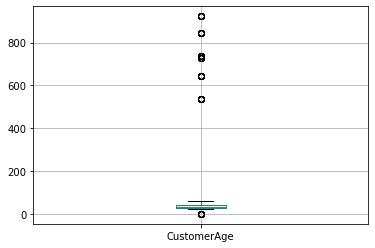

In [30]:
dirtydata4bestdeal.boxplot(column='CustomerAge')


<AxesSubplot:>

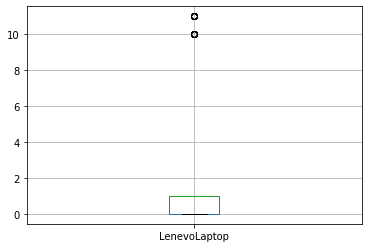

In [31]:
dirtydata4bestdeal.boxplot(column='LenevoLaptop')

<AxesSubplot:>

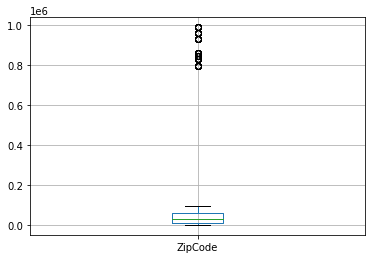

In [32]:
dirtydata4bestdeal.boxplot(column='ZipCode')


### Lets clean the dirty/messy data in the dirtydata4bestdeal dataframe object

In [33]:
# Drop the NaN values 

cleandata4bestdeal=dirtydata4bestdeal.dropna()
cleandata4bestdeal.head()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
5,2108.0,55.0,1,1,1,1,10,0.0,0.0,0.0,...,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0
6,90033.0,44.0,1,1,1,1,0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1


In [34]:
cleandata4bestdeal.isnull().sum().sum()

0

In [35]:
cleandata4bestdeal = cleandata4bestdeal[cleandata4bestdeal['ZipCode'] < 100000]
cleandata4bestdeal = cleandata4bestdeal[cleandata4bestdeal['CustomerAge'].between(18, 150)]

In [36]:
cleandata4bestdeal.describe().T

,count,mean,std,min,25%,50%,75%,max
ZipCode,9312.0,39597.916452,29754.468934,2108.0,10065.0,30303.0,60616.0,94158.0
CustomerAge,9312.0,35.140142,10.191729,21.0,27.0,34.0,43.0,61.0
SamsungTV46LED,9312.0,0.671499,0.469693,0.0,0.0,1.0,1.0,1.0
BoseHeadSet,9312.0,0.524592,0.586459,0.0,0.0,1.0,1.0,11.0
SonyHeadSet,9312.0,0.837629,0.368811,0.0,1.0,1.0,1.0,1.0
iPod,9312.0,0.180627,0.492472,0.0,0.0,0.0,0.0,11.0
iPhone,9312.0,0.361040,0.480328,0.0,0.0,0.0,1.0,1.0
Panasonic50LED,9312.0,0.232925,0.422718,0.0,0.0,0.0,0.0,1.0
SonyPS4,9312.0,0.150451,0.357532,0.0,0.0,0.0,0.0,1.0
WiiU,9312.0,0.483355,0.511433,0.0,0.0,0.0,1.0,11.0


In [37]:
cleandata4bestdeal.dtypes

ZipCode               float64
CustomerAge           float64
SamsungTV46LED          int64
SonyTV42LED            object
XBOX360                object
DellLaptop             object
BoseSoundSystem        object
BoseHeadSet           float64
SonyHeadSet           float64
iPod                  float64
iPhone                float64
Panasonic50LED        float64
SonyPS4               float64
WiiU                  float64
WDexternalHD          float64
SamsungTV55LED        float64
SonyTV60LED           float64
SandiskMemoryCard     float64
SonySoundSystem       float64
SonyCamera              int64
PanasonicCamera         int64
HPPrinter             float64
SonyDVDplayer         float64
ToshibaDVDplayer      float64
GalaxyTablet            int64
SurfaceTablet         float64
HPLaptop              float64
HDMICable             float64
SpeakerCable          float64
CallOfDutyGame        float64
GrandTheftAutoGame    float64
ASUSLaptop            float64
LenevoLaptop          float64
TVStandWal

In [38]:
cleandata4bestdeal['SonyTV42LED'].unique()

array(['1', '0', ' '], dtype=object)

In [39]:
print(cleandata4bestdeal[cleandata4bestdeal['SonyTV42LED'] == ' '])

cleandata4bestdeal = cleandata4bestdeal.replace(r'^\s*$', np.nan, regex=True)

cleandata4bestdeal = cleandata4bestdeal.dropna()

      ZipCode  CustomerAge  SamsungTV46LED SonyTV42LED XBOX360 DellLaptop  \
9942   2109.0         43.0               1                                  

     BoseSoundSystem  BoseHeadSet  SonyHeadSet  iPod  ...  GalaxyTablet  \
9942               0          0.0          0.0   0.0  ...             0   

      SurfaceTablet  HPLaptop  HDMICable  SpeakerCable  CallOfDutyGame  \
9942            0.0       1.0        0.0           1.0             1.0   

      GrandTheftAutoGame  ASUSLaptop  LenevoLaptop  TVStandWallMount  
9942                 1.0         0.0           0.0                 1  

[1 rows x 34 columns]


In [40]:
cols = cleandata4bestdeal.columns[2:]
print(cols)

Index(['SamsungTV46LED', 'SonyTV42LED', 'XBOX360', 'DellLaptop',
       'BoseSoundSystem', 'BoseHeadSet', 'SonyHeadSet', 'iPod', 'iPhone',
       'Panasonic50LED', 'SonyPS4', 'WiiU', 'WDexternalHD', 'SamsungTV55LED',
       'SonyTV60LED', 'SandiskMemoryCard', 'SonySoundSystem', 'SonyCamera',
       'PanasonicCamera', 'HPPrinter', 'SonyDVDplayer', 'ToshibaDVDplayer',
       'GalaxyTablet', 'SurfaceTablet', 'HPLaptop', 'HDMICable',
       'SpeakerCable', 'CallOfDutyGame', 'GrandTheftAutoGame', 'ASUSLaptop',
       'LenevoLaptop', 'TVStandWallMount'],
      dtype='object')


In [41]:
cleandata4bestdeal[cols] = cleandata4bestdeal[cols].apply(np.int64)

In [42]:
cleandata4bestdeal = cleandata4bestdeal[~(((cleandata4bestdeal.iloc[:, 2:]) > 1.5) | (cleandata4bestdeal.iloc[:, 2:] < 0)).any(1)]

In [43]:
cleandata4bestdeal.describe().T

,count,mean,std,min,25%,50%,75%,max
ZipCode,9092.0,39604.337330,29698.851112,2108.0,10065.0,30303.0,60616.0,94158.0
CustomerAge,9092.0,35.189177,10.156019,21.0,27.0,34.0,43.0,61.0
SamsungTV46LED,9092.0,0.669710,0.470343,0.0,0.0,1.0,1.0,1.0
SonyTV42LED,9092.0,0.808073,0.393838,0.0,1.0,1.0,1.0,1.0
XBOX360,9092.0,0.809503,0.392715,0.0,1.0,1.0,1.0,1.0
DellLaptop,9092.0,0.518478,0.499686,0.0,0.0,1.0,1.0,1.0
BoseSoundSystem,9092.0,0.482842,0.499733,0.0,0.0,0.0,1.0,1.0
BoseHeadSet,9092.0,0.513858,0.499835,0.0,0.0,1.0,1.0,1.0
SonyHeadSet,9092.0,0.838869,0.367672,0.0,1.0,1.0,1.0,1.0
iPod,9092.0,0.170919,0.376459,0.0,0.0,0.0,0.0,1.0


**Zip Codes**
- The 4-digit zip codes are missing the starting 0, and are in Massachusetts. It seems like dropping the 0 still works with most searches.
- The 6-digit codes have been removed

**Age**
- Rows have been removed where the age is not between 18 and 150

**Remaining Columns**
- Rows have been removed if the data is not 0 or 1 including instances of blank spaces '  '

### Lets store the cleaned data into the Database

In [44]:
engine=create_engine('sqlite:///bestdeals.db')

In [45]:
cleandata4bestdeal.to_sql('trans4cust', engine)

9092

In [46]:
insp=inspect(engine)

In [47]:
 insp.get_table_names()

['trans4cust']

In [48]:
pd.read_sql_table('trans4cust', engine).columns

Index(['index', 'ZipCode', 'CustomerAge', 'SamsungTV46LED', 'SonyTV42LED',
       'XBOX360', 'DellLaptop', 'BoseSoundSystem', 'BoseHeadSet',
       'SonyHeadSet', 'iPod', 'iPhone', 'Panasonic50LED', 'SonyPS4', 'WiiU',
       'WDexternalHD', 'SamsungTV55LED', 'SonyTV60LED', 'SandiskMemoryCard',
       'SonySoundSystem', 'SonyCamera', 'PanasonicCamera', 'HPPrinter',
       'SonyDVDplayer', 'ToshibaDVDplayer', 'GalaxyTablet', 'SurfaceTablet',
       'HPLaptop', 'HDMICable', 'SpeakerCable', 'CallOfDutyGame',
       'GrandTheftAutoGame', 'ASUSLaptop', 'LenevoLaptop', 'TVStandWallMount'],
      dtype='object')

### Now we are ready to query the Database

#### Query example #1: get the transactions for the customers in zipCode 60616

In [49]:
resultsForBestDealCustTrans=pd.read_sql_query("SELECT * FROM trans4cust WHERE ZipCode='60616'", engine)

In [50]:
resultsForBestDealCustTrans.head()

,index,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,3,60616.0,56.0,0,1,1,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
1,16,60616.0,43.0,0,1,1,0,1,0,1,...,1,0,1,1,1,1,0,1,1,1
2,18,60616.0,54.0,1,0,0,1,0,1,1,...,0,1,1,0,1,1,0,1,1,1
3,23,60616.0,43.0,1,1,1,0,1,1,1,...,1,1,1,1,0,1,0,1,1,1
4,34,60616.0,31.0,0,1,1,1,0,0,1,...,1,0,1,1,1,1,1,0,0,1


#### Query example #2: get the transactions for ALL customers

In [51]:
resultsForBestDealCustTrans=pd.read_sql_query("SELECT * FROM trans4cust", engine)

In [52]:
resultsForBestDealCustTrans.head()

,index,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,0,30134.0,35.0,1,1,1,0,0,1,1,...,1,0,1,1,1,1,0,1,1,1
1,1,62791.0,43.0,0,1,0,0,1,0,1,...,1,0,1,0,1,1,0,1,1,1
2,3,60616.0,56.0,0,1,1,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,6,90033.0,44.0,1,1,1,1,0,0,0,...,1,1,1,1,0,1,1,0,0,1
4,9,2109.0,37.0,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,1,1,0


#### Query example #3: get the number of customers in every ZipCode sorted by ZipCode

In [53]:
resultsForBestDealCustTrans=pd.read_sql_query("SELECT ZipCode , COUNT(*) as 'num_customers' FROM trans4cust GROUP BY ZipCode  ORDER BY ZipCode", engine)

In [54]:
resultsForBestDealCustTrans

,ZipCode,num_customers
0,2108.0,613
1,2109.0,917
2,2110.0,224
3,10065.0,750
4,30134.0,1133
5,30303.0,985
6,33129.0,531
7,33130.0,280
8,44114.0,510
9,60532.0,243


#### Query example #4: get the number of customers for  every Age Group in ZipCode 60616 sorted by CustomerAge

In [55]:
resultsForBestDealCustTrans=pd.read_sql_query(
"SELECT CustomerAge , COUNT(*) as 'num_customers' FROM trans4cust WHERE ZipCode=60616 GROUP BY CustomerAge  ORDER BY CustomerAge", engine)

In [56]:
resultsForBestDealCustTrans

,CustomerAge,num_customers
0,21.0,56
1,22.0,32
2,23.0,40
3,25.0,88
4,26.0,48
5,27.0,32
6,28.0,32
7,29.0,56
8,31.0,16
9,32.0,16


#### Query example #5: Plot in a stacked-bar figure the number of customers who bought SonyTV60LED and/or BoseSoundSystem in  every zipcode that has more than 400 customers who bought these two products(either bought one of these products or the two products)

In [57]:
SonyTV60LEDCustTrans=pd.read_sql_query(
"SELECT ZipCode , COUNT(*) as 'num_customers' FROM trans4cust WHERE SonyTV60LED=1  GROUP BY ZipCode HAVING COUNT(*) > 400", engine)

BoseSoundSystemCustTrans=pd.read_sql_query(
"SELECT ZipCode , COUNT(*) as 'num_customers' FROM trans4cust WHERE BoseSoundSystem=1 GROUP BY ZipCode HAVING COUNT(*) > 400", engine)

In [58]:
SonyTV60LEDCustTrans

,ZipCode,num_customers
0,2108.0,402
1,2109.0,578
2,10065.0,439
3,30134.0,757
4,30303.0,517
5,60616.0,689


In [59]:
BoseSoundSystemCustTrans

,ZipCode,num_customers
0,2109.0,424
1,30134.0,799
2,30303.0,464
3,60616.0,466
4,90033.0,404


In [60]:
SonyTV60LEDCustTrans.ZipCode


0     2108.0
1     2109.0
2    10065.0
3    30134.0
4    30303.0
5    60616.0
Name: ZipCode, dtype: float64

In [61]:
import numpy

#   There are zipcodes that Sony got bought but not Bose 
#   but there are also zipcodes that Bose got bought but not Sony
#
#   AND we need to use stacked-bar graph and we have a potentially asymmetrical set  of zipcode values
#   So, we need to do somework to create the symmteric set of zipcode values for Sony and Bose


sonyZipCodeTuples=tuple(SonyTV60LEDCustTrans.ZipCode.astype(numpy.int))
sony_num_customersTuples=tuple(SonyTV60LEDCustTrans.num_customers.astype(numpy.int))

boseZipCodeTuples=tuple(BoseSoundSystemCustTrans.ZipCode.astype(numpy.int))
bose_num_customersTuples=tuple(BoseSoundSystemCustTrans.num_customers.astype(numpy.int))




sony_dict = dict(zip(sonyZipCodeTuples, sony_num_customersTuples))
bose_dict = dict(zip(boseZipCodeTuples, bose_num_customersTuples))

for key in bose_dict.keys():
    if ((key in sony_dict.keys()) == False): sony_dict[key]=0

        
for key in sony_dict.keys():
    if ((key in bose_dict.keys()) == False): bose_dict[key]=0


        
bose_zip= sorted(bose_dict.keys())

sony_zip= sorted(sony_dict.keys())

bose_zip_tuple=tuple(bose_zip)

sony_zip_tuple=tuple(sony_zip)

bose_customer_list=[]

for bose in bose_zip_tuple:
    bose_customer_list.append(bose_dict[bose])

sony_customer_list=[]

for sony in sony_zip_tuple:
    sony_customer_list.append(sony_dict[sony])

bose_customer_tuple=tuple(bose_customer_list)
sony_customer_tuple=tuple(sony_customer_list)


C:\Users\richd\AppData\Local\Temp\ipykernel_20492\3321664717.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sonyZipCodeTuples=tuple(SonyTV60LEDCustTrans.ZipCode.astype(numpy.int))
C:\Users\richd\AppData\Local\Temp\ipykernel_20492\3321664717.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review yo

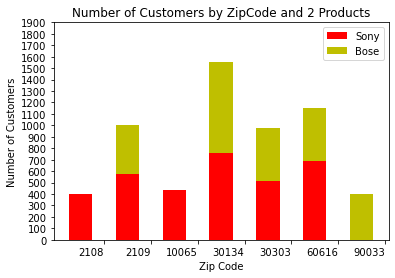

In [62]:
# See docs for bar_stack at the URL
# http://matplotlib.org/examples/pylab_examples/bar_stacked.html

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 


ind = np.arange(len(sony_customer_tuple))    


# the width of the bars: can also be len(x) sequence
width = .5


p1 = plt.bar(ind, sony_customer_tuple, width,  color='r')
p2 = plt.bar(ind, bose_customer_tuple, width, color='y', bottom=sony_customer_tuple)


plt.ylabel('Number of Customers')
plt.xlabel('Zip Code')

plt.title('Number of Customers by ZipCode and 2 Products')

plt.xticks(ind + width, sony_zip_tuple, horizontalalignment='right')

plt.yticks(np.arange(0, 2000, 100))
plt.legend((p1[0], p2[0]), ('Sony', 'Bose'))

plt.show()

# Requirements :
1. (Use SQL/SQlite): get the number of customers who bought DellLaptop and HPPrinter for every Age group sorted by CustomerAge
2. (Use SQL/SQlite): Get the list of ZipCodes where no customer bought XBOX360 (this query means NOT even a single csutomer in that zip code bought XBOX360)
3. (Use SQL/SQlite/Matplotlib): Plot in a stacked-bar figure the number of customers who bought HPLaptop and/or HPPrinter but did NOT buy  WDexternalHD for  every CustomerAge group that has more than 100 customers who bought these two products(either bought one of these products or the two products but didn't buy WDexternalHD)


In [70]:
# 1. Get the number of customers who bought DellLaptop and HPPrinter for every Age group sorted by CustomerAge

dell_and_hp_purchasers_byage = pd.read_sql_query("""
                                            SELECT CustomerAge as age,
                                                COUNT(CustomerAge) as num_customers
                                            FROM trans4cust
                                            WHERE DellLaptop = '1'
                                            AND HPPrinter = '1'
                                            GROUP BY CustomerAge
                                            ORDER BY CustomerAge asc;                    
                                            """, engine)
dell_and_hp_purchasers_byage

,age,num_customers
0,21.0,201
1,22.0,203
2,23.0,304
3,25.0,64
4,26.0,183
5,27.0,272
6,28.0,56
7,29.0,143
8,31.0,194
9,32.0,184


In [71]:
# 2. Get the list of ZipCodes where no customer bought XBOX360

zipcodes_wo_xbox360_purch = pd.read_sql_query("""
                                    WITH xbox_purch as (
                                        SELECT ZipCode,
                                            SUM(XBOX360) as num_xbox
                                        FROM trans4cust
                                        GROUP BY ZipCode
                                    )
                                    
                                        SELECT ZipCode
                                        FROM xbox_purch
                                        WHERE num_xbox = 0
                                        ORDER BY ZipCode asc;
                                    """, engine)
print(zipcodes_wo_xbox360_purch)

   ZipCode
0  62791.0


In [78]:
# 3. Plot in a stacked-bar figure the number of customers who bought HPLaptop and/or HPPrinter but did NOT buy 
## WDexternalHD for every CustomerAge group that has more than 100 customers who bought these two products
## (either bought one of these products or the two products but didn't buy WDexternalHD)

num_cust_bought_hp_not_wd_byage = pd.read_sql_query("""
                                            
                                            with total as(
                                                SELECT CustomerAge as age,
                                                    COUNT(CustomerAge) as num_customers
                                                FROM trans4cust
                                                WHERE HPLaptop = '1'
                                                OR HPPrinter = '1'
                                                GROUP BY CustomerAge
                                                ORDER BY CustomerAge asc
                                            )
                                            
                                            , wd as (
                                                SELECT CustomerAge as age,
                                                    COUNT(CustomerAge) as num_customers
                                                FROM trans4cust
                                                WHERE (HPLaptop = '1' OR HPPrinter = '1')
                                                AND WDexternalHD = '1'
                                                GROUP BY CustomerAge
                                            ) 
                                            
                                            , not_wd as(
                                                SELECT CustomerAge as age,
                                                    COUNT(CustomerAge) as num_customers
                                                FROM trans4cust
                                                WHERE (HPLaptop = '1' OR HPPrinter = '1')
                                                AND WDexternalHD = '0'
                                                GROUP BY CustomerAge
                                            )
                                            
                                                SELECT t.age,
                                                    t.num_customers as all_hp,
                                                    w.num_customers as yes_wd,
                                                    n.num_customers as no_wd
                                                FROM total t
                                                LEFT JOIN wd w
                                                ON t.age = w.age
                                                LEFT JOIN not_wd n
                                                ON t.age = n.age
                                                WHERE t.num_customers > 100
                                                ORDER BY t.age asc;                    
                                                """, engine)
num_cust_bought_hp_not_wd_byage

,age,all_hp,yes_wd,no_wd
0,21.0,201,9,192
1,22.0,267,64,203
2,23.0,735,298,437
3,24.0,184,152,32
4,25.0,472,325,147
5,26.0,343,138,205
6,27.0,505,198,307
7,28.0,486,360,126
8,29.0,462,172,290
9,31.0,202,6,196


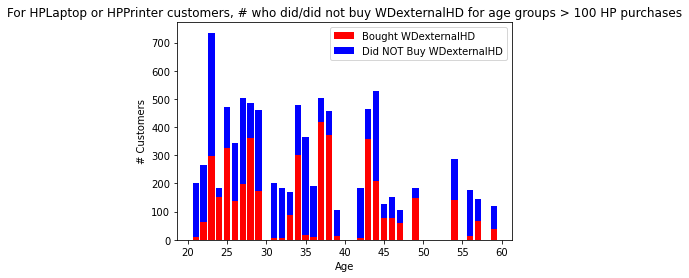

In [86]:
x = num_cust_bought_hp_not_wd_byage['age']
y1 = num_cust_bought_hp_not_wd_byage['yes_wd']
y2 = num_cust_bought_hp_not_wd_byage['no_wd']
wd = ['Bought WDexternalHD', 'Did NOT Buy WDexternalHD']

plt.bar(x, y1, color='red')
plt.bar(x, y2, bottom=y1, color='blue')
plt.legend(wd, loc=1)
plt.xlabel('Age')
plt.ylabel('# Customers')
plt.title('For HPLaptop or HPPrinter customers, # who did/did not buy WDexternalHD for age groups > 100 HP purchases')
plt.show()